<a href="https://colab.research.google.com/github/TheDon57/MODS_Exercises/blob/main/Week_10_exercise/Sentiment_Analysis_Week_10_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import random
# Set seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

## Introduction

Similarly to last week, in this week's tutorial we will again perform a **sentiment analysis**. The difference is that this time we want to learn the sentiment of words using **supervised learning** instead of looking them up in a dictionary.

The dataset is the same as last week, so we are still trying to classify movie reviews (from IMDB) as positive or negative.

## Data

The dataset we will use contains movie reviews from IMDB. Initially the data is stored as a dataframe with three columns (id, sentiment_human, text).

*Run the code below.*

In [20]:
import pandas as pd
#Loading the data from a csv file
reviews = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/imdb_sample.csv")

Our dataset has movie reviews labeled as either 'positive' or 'negative' in the 'sentiment_human' column. But for machine learning models to understand and learn from this data, we need to convert these text labels into numbers. We'll create a new column called 'sentiment_positive' where:

- Positive reviews get a 1
- Negative reviews get a 0

This is called binary encoding, and it's necessary because most classification algorithms work with numerical values, not words. We're using NumPy's `np.where` function, which works like a simple if-else statement: if the original sentiment is 'positive', assign 1; otherwise, assign 0.

*Run the code below.*

In [21]:
# Recode sentiment_human
reviews['sentiment_positive'] = np.where(reviews['sentiment_human'] == 'positive', 1, 0)


## Convert data to text format for processing
We will use the text of the movie reviews that we used last week for further analysis.

*Run the code below.*

In [22]:
# Display the first row of the data
reviews['text'].iloc[0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

## Preprocessing
Since unstructured data doesn't have an inherent and consistent structure we have to perform some preprocessing steps in order to make the data usable for the computer.
One thing to keep in mind is that the more preprocessing we perform the more information we lose, but the basic methods we are using here require it.

### Tokenize documents
First, we tokenize the texts. This means we transform the texts from one long string to a list of tokens. Additionally we also start removing unwanted characters (e.g punctuation between sentences, numbers, etc.).
For a full list and explanation of the used parameters you can have a look at the documentation.

In the code, we use `nltk.word_tokenize(text)` to break the input text into individual words or tokens. This is the first step in preprocessing, as computers need to work with smaller units rather than entire sentences.

### Lemmatize all words
After tokenizing the texts we perform lemmatization (alternatively stemming could be performed). Lemmatization replaces each word with its dictionary form ([lemma](https://en.wikipedia.org/wiki/Lemma_(morphology))).

In the code, we create a `WordNetLemmatizer` object from NLTK. Then, we apply lemmatization to each token using a list comprehension: `[lemmatizer.lemmatize(token) for token in tokens]`. This reduces words to their base or root form (e.g., "running" becomes "run"), helping to group similar words together for better analysis. Compared to last week, we're using lemmatization instead of stemming for more accurate word normalization.

### Remove stopwords
Finally we remove words that don't contain real meaning and are commonly used (e.g. 'this', 'the', 'a', etc.).

We get a list of English stopwords using `nltk.corpus.stopwords.words("english")`. Then, we filter out any stemmed tokens that are in this list (case-insensitive). Stopwords are common words that don't carry much sentiment or meaning, so removing them reduces noise in the data.

### Remove punctuation
Additionally, we remove any remaining punctuation marks from the filtered tokens. This is done by checking if each token is not in `string.punctuation`, which contains common punctuation characters like '.', ',', '!', etc. This further cleans the text by eliminating non-alphabetic characters that aren't useful for sentiment analysis.

The function `preprocess(text)` combines all these steps and returns a list of cleaned, stemmed tokens without stopwords or punctuation.

*Run the code below.*

In [23]:
# Preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the punkt resource
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Define function with all necessary preprocessing steps for our IMDB reviews. In comparison to last week we now use Lemmatization instead of Stemming.
def preprocess(text):
    # tokenize the text
    tokens = nltk.word_tokenize(text)

    # create lemmatizer object
    lemmatizer = WordNetLemmatizer()

    # lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # get list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # remove stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stopwords]

    # remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return  " ".join(filtered_tokens_nopunct)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Apply preprocessing

After defining the different preprocessing steps, we now apply these preprocessing steps to our IMDB reviews.

In the code, `reviews['processed_text'].apply(preprocess)` takes each review text from the 'text' column of the DataFrame and passes it to our `preprocess` function. This function returns a list of cleaned tokens for each review. These lists are then stored in a new column called 'tokens' in the `reviews` DataFrame.

To see the result, we display the first row of the DataFrame using `reviews['processed_text'].iloc[0]`. This shows preprocessed list of words from the first review.

*Run the code below.*

In [24]:
# Apply text preprocessing
reviews['processed_text'] = reviews['text'].apply(preprocess)
reviews['processed_text'].iloc[0]  # Display first processed review

"stuff going moment MJ 've started listening music watching odd documentary watched Wiz watched Moonwalker Maybe want get certain insight guy thought wa really cool eighty maybe make mind whether guilty innocent Moonwalker part biography part feature film remember going see cinema wa originally released ha subtle message MJ 's feeling towards press also obvious message drug bad m'kay. br br Visually impressive course Michael Jackson unless remotely like MJ anyway going hate find boring may call MJ egotist consenting making movie MJ fan would say made fan true really nice him. br br actual feature film bit finally start 20 minute excluding Smooth Criminal sequence Joe Pesci convincing psychopathic powerful drug lord want MJ dead bad beyond MJ overheard plan Nah Joe Pesci 's character ranted wanted people know supplying drug etc dunno maybe hate MJ 's music. br br Lots cool thing like MJ turning car robot whole Speed Demon sequence Also director must patience saint came filming kiddy Bad

## Remove irrelevant words
In this case, we manually remove specific words that are irrelevant to the analysis.

In the code, we use `reviews['processed_text'].replace(['amp', 'document'], '', regex=True)` to remove the words 'amp' and 'document' from the 'processed_text' column. The `replace` method with `regex=True` allows us to replace these specific strings with an empty string, effectively deleting them. 'Amp' might be leftover from HTML entities (like &amp;), and 'document' could be metadata that's not useful for sentiment analysis. By removing these, we further clean the text to focus on meaningful content. We then display the first processed review to verify the changes.

*Run the code below.*

In [25]:
# Remove additional irrelevant words (amp, document)
reviews['processed_text'] = reviews['processed_text'].replace(['amp', 'document'], '', regex=True)
reviews['processed_text'].iloc[0]


"stuff going moment MJ 've started listening music watching odd ary watched Wiz watched Moonwalker Maybe want get certain insight guy thought wa really cool eighty maybe make mind whether guilty innocent Moonwalker part biography part feature film remember going see cinema wa originally released ha subtle message MJ 's feeling towards press also obvious message drug bad m'kay. br br Visually impressive course Michael Jackson unless remotely like MJ anyway going hate find boring may call MJ egotist consenting making movie MJ fan would say made fan true really nice him. br br actual feature film bit finally start 20 minute excluding Smooth Criminal sequence Joe Pesci convincing psychopathic powerful drug lord want MJ dead bad beyond MJ overheard plan Nah Joe Pesci 's character ranted wanted people know supplying drug etc dunno maybe hate MJ 's music. br br Lots cool thing like MJ turning car robot whole Speed Demon sequence Also director must patience saint came filming kiddy Bad sequenc

## Supervised Sentiment Analysis
Last week we performed **dictionary-based Sentiment Analysis** where we used a dictionary to look up each word's sentiment. This week we want to learn the sentiment of the words contained in the reviews by using **supervised learning**. However, this needs additional dataset transformations which we will perform subsequently.

### Prepare data for classifier
We split the data into a training and test set for supervised learning.

First, we create `reviews_preprocessed` by dropping the original 'text' column using `reviews.drop(columns="text")`, since we've already processed it into 'processed_text' and don't need the raw text anymore.

Similar to before, we define our features `X` by dropping the target column 'sentiment_positive' from `reviews_preprocessed`, and our target `y` as the 'sentiment_positive' column. Finally, we use `train_test_split(X, y, test_size=0.2, random_state=42)` to split the data: 80% for training and 20% for testing, with a fixed random state for reproducibility. This ensures we can train the model on one portion and evaluate it on unseen data.


*Run the code below.*

In [26]:
from sklearn.model_selection import train_test_split

#Drop original review text from the data as we don't need it anymore
reviews_preprocessed = reviews.drop(columns="text")

#define X and y
X = reviews_preprocessed.drop(columns=['sentiment_positive'])
y = reviews_preprocessed['sentiment_positive']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Construct document-term matrix for training set and test set
We transform the training and the test data into a matrix where each row represents a text, and each column represents a word (token). We apply TF-IDF to the matrix. The cell (i,j) represents the number of occurrences of the j-th word in the i-th document. The resulting matrix has 5,000 rows (documents) and 33,071 columns (features/tokens).

We create a `CountVectorizer` instance, which will count the occurrences of each word in the texts. We fit it on the training data's 'processed_text' using `fit(X_train['processed_text'])`, which learns the vocabulary, and then transform both training and test sets to create sparse matrices of word counts.

We then print the shapes to see the dimensions (rows are documents, columns are unique words). To make it easier to work with, we convert these sparse matrices to DataFrames using `pd.DataFrame`, with columns named after the feature names (words).

Finally, we display the first few rows of the training matrix to inspect the word counts for each document.

*Run the code below.*

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text using Term Frequency
count_vectorizer = CountVectorizer()
tf_vectorizer = count_vectorizer.fit(X_train['processed_text'])
reviews_matrix_train = tf_vectorizer.transform(X_train['processed_text'])
reviews_matrix_test = tf_vectorizer.transform(X_test['processed_text'])

# Show the shape of the resulting matrix
print(reviews_matrix_train.shape)
print(reviews_matrix_test.shape)

# Turn matrix into a DataFrame so it can be used for supervised learning and merge with sentiment
reviews_matrix_train_df = pd.DataFrame(reviews_matrix_train.toarray(), columns=count_vectorizer.get_feature_names_out())
reviews_matrix_test_df = pd.DataFrame(reviews_matrix_test.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of the training matrix
reviews_matrix_train_df.head()

(4000, 33077)
(1000, 33077)


,00,000,001,007,00pm,00s,01,02,03,04,...,zulu,zumhofe,zuniga,zurich,zvonimir,zy,zz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Remove rare terms from the train and test matrix (min_df)

In order to decrease the size of the matrix we filter out tokens that occur less than 15 times (columns whose sum is <15). Therefore, we start by creating a `CountVectorizer` with `min_df=15`, which creates a tool that counts words but only includes words that appear in at least 15 reviews. This removes rare words that might not help the model.

Then, `tf_vectorizer = count_vectorizer.fit(X_train['processed_text'])` teaches the tool the list of words from the training reviews.

Next, `reviews_matrix_train = tf_vectorizer.transform(X_train['processed_text'])` converts the training reviews into a big table where each row is a review and each column is a word, with numbers showing how many times each word appears. Similarly, `reviews_matrix_test = tf_vectorizer.transform(X_test['processed_text'])` does the same for the test reviews using the same list of words.

The print statements show the size of these tables. Then, the code turns these matrices into DataFrames with word names as column headers for easier use. Finally, `reviews_matrix_train_df.head()` displays the first 5 rows of the training DataFrame to see the word counts.

This already decreases the number of columns from 33,071 to 3,927.

*Run the code below.*

In [28]:
# Vectorize the text using Term Frequency
count_vectorizer = CountVectorizer(min_df=15) #define min_df
tf_vectorizer = count_vectorizer.fit(X_train['processed_text'])
reviews_matrix_train = tf_vectorizer.transform(X_train['processed_text'])
reviews_matrix_test = tf_vectorizer.transform(X_test['processed_text'])

# Show the shape of the resulting matrix
print(reviews_matrix_train.shape)
print(reviews_matrix_test.shape)

# Turn matrix into a DataFrame so it can be used for supervised learning and merge with sentiment
reviews_matrix_train_df = pd.DataFrame(reviews_matrix_train.toarray(), columns=count_vectorizer.get_feature_names_out())
reviews_matrix_test_df = pd.DataFrame(reviews_matrix_test.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of the training matrix
reviews_matrix_train_df.head()

(4000, 3925)
(1000, 3925)


,000,10,100,11,12,13,14,15,16,17,...,york,you,young,younger,youngest,youth,youtube,zero,zombie,zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,2,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform counts to TF-IDF weights

In the previous step we used the **term frequency (TF)** to filter out very rare words since they most likely won't contribute a lot to our model. On the other hand terms that appear in almost every document are also most likely to be not so informative but TF isn't enough to determine that. That's why we need an additional metric called **inverse document frequency (IDF)** which takes on big values for terms that only appear in a few documents and small values for terms that appear very often.

When we put these two metrics together we get the **TF-IDF = TF\*IDF**. We use this formula to recalculate our matrix entries.

First, we create a `TfidfVectorizer` with `min_df=15` to keep the same filtering as before. TF-IDF weights words by how important they are, combining how often they appear in a document with how rare they are across all documents.

Next, `tfidf_vectorizer = vectorizer.fit(X_train['processed_text'])` learns the vocabulary and calculates the IDF from the training data. After that, `reviews_matrix_train_tfidf = tfidf_vectorizer.transform(X_train['processed_text'])` converts the training reviews into a TF-IDF matrix, and `reviews_matrix_test_tfidf = tfidf_vectorizer.transform(X_test['processed_text'])` does the same for the test reviews.

The print statements display the shapes of these matrices. Then, we convert the matrices to DataFrames with word names as columns. Finally, `reviews_matrix_train_df_tfidf.head()` shows the first 5 rows of the training DataFrame, revealing the weighted scores for each word in each review.

*Run the code below.*

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(min_df=15) #define min_df
tfidf_vectorizer = vectorizer.fit(X_train['processed_text'])
reviews_matrix_train_tfidf = tfidf_vectorizer.transform(X_train['processed_text'])
reviews_matrix_test_tfidf = tfidf_vectorizer.transform(X_test['processed_text'])

# Show the shape of the resulting matrix
print(reviews_matrix_train_tfidf.shape)
print(reviews_matrix_test_tfidf.shape)

# Turn matrix into a DataFrame so it can be used for supervised learning and merge with sentiment
reviews_matrix_train_df_tfidf = pd.DataFrame(reviews_matrix_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
reviews_matrix_test_df_tfidf = pd.DataFrame(reviews_matrix_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the training matrix
reviews_matrix_train_df_tfidf.head()

(4000, 3925)
(1000, 3925)


,000,10,100,11,12,13,14,15,16,17,...,york,you,young,younger,youngest,youth,youtube,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104511,...,0.0,0.0,0.113668,0.177071,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Train and evaluate classifier
From here on, almost everything is the same as before when we performed classification with the only difference being that the input features are now terms instead of numbers or categorical values.


### Train random forest classifier
We train a random forest classifier on the training set (without hyperparameter tuning) to classify the sentiment based on the processed text features.

*Run the code below.*

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_01 = RandomForestClassifier(random_state=42).fit(reviews_matrix_train_df_tfidf, y_train)


We can see that there are different parameters that have to be specified in order to train a random forest. The __Number of trees__ (n_estimators) for example tells us how many trees have been trained.   
For a complete list of the `RandomForestClassifier` functions parameters, you can have a look at its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

*Run the code below.*


In [31]:
print("Parameters:", rf_01.get_params())

Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Make predictions and calculate evaluation metrics on test set

Similarly to the last weeks, we can make predictions on the test set and calculate different evaluation metrics.

*Run the code below.*

Accuracy (Random Forests): 0.822


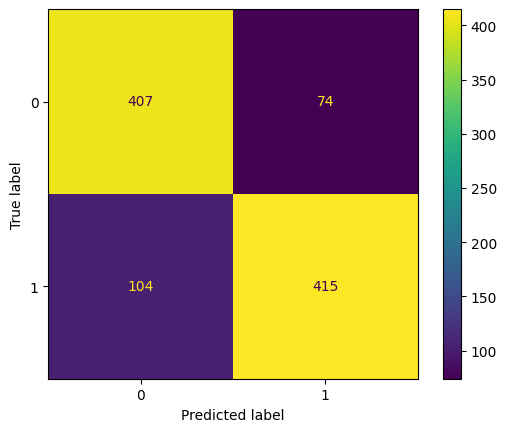

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

predictions_testset_rf01 = rf_01.predict_proba(reviews_matrix_test_df_tfidf)[:, 1]
predictions_testset_rf01_binary = np.where(predictions_testset_rf01 > 0.5, 1, 0)

# Calculate Accuracy

accuracy_rf = accuracy_score(y_test, predictions_testset_rf01_binary)
print("Accuracy (Random Forests):", accuracy_rf)

# Create the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions_testset_rf01_binary)

### ROC and Auc

Plot ROC curve and calculate AUC on test set.
With __binary__ classification we get relatively straight lines. With the classification __probability__ we can map the distribution better. That is why we use the classification probability (e.g., predictions_testset_rf01) to calculate the AUC.

*Run the code below.*

AUC Score: 0.9105808787889713


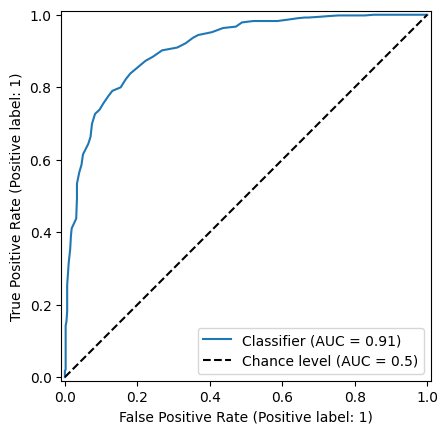

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Calculate and Print the AUC score
auc_score = roc_auc_score(y_test, predictions_testset_rf01)
print("AUC Score:", auc_score)

#plot ROC curve
RocCurveDisplay.from_predictions(y_test, predictions_testset_rf01, plot_chance_level=True)

# Summary
In this tutorial, we:

1. Preprocessed the text (tokenization, lemmatization, stopword removal, etc.).
2. Made a Train Test Split of the data.
2. Transformed the data into a matrix using TF-IDF.
3. Performed supervised sentiment analysis using a random forest classifier.
4. Evaluated the model using accuracy, confusion matrix, ROC curve, and AUC.

## Perform additional analyses below

You can use the cell below to perform and evaluate different sentiment analyses

Accuracy (Random Forests): 0.811
AUC Score: 0.8986075893590344


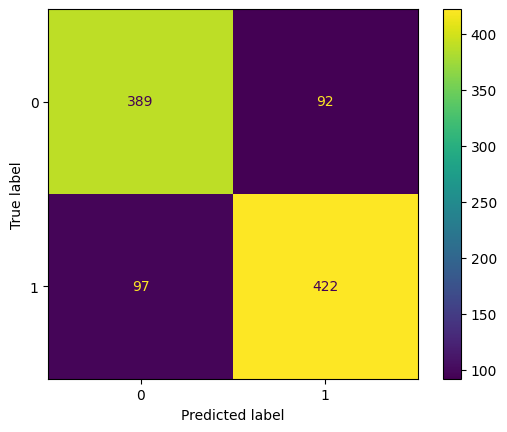

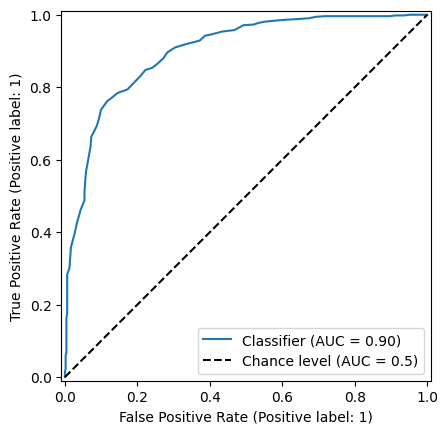

In [36]:
# Enter your Code here!
# Recode sentiment_human
reviews['sentiment_positive'] = np.where(reviews['sentiment_human'] == 'positive', 1, 0)

def preprocess(text):
    # tokenize the text
    tokens = nltk.word_tokenize(text)

    # create lemmatizer object
    lemmatizer = WordNetLemmatizer()

    # lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # get list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # remove stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stopwords]

    # remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return  " ".join(filtered_tokens_nopunct)

# Apply text preprocessing
reviews['processed_text'] = reviews['text'].apply(preprocess)
reviews['processed_text'].iloc[0]

#Drop original review text from the data as we don't need it anymore
reviews_preprocessed = reviews.drop(columns="text")

#define X and y
X = reviews_preprocessed.drop(columns=['sentiment_positive'])
y = reviews_preprocessed['sentiment_positive']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(min_df=50) #define min_df
tfidf_vectorizer = vectorizer.fit(X_train['processed_text'])
reviews_matrix_train_tfidf = tfidf_vectorizer.transform(X_train['processed_text'])
reviews_matrix_test_tfidf = tfidf_vectorizer.transform(X_test['processed_text'])

# Turn matrix into a DataFrame so it can be used for supervised learning and merge with sentiment
reviews_matrix_train_df_tfidf = pd.DataFrame(reviews_matrix_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
reviews_matrix_test_df_tfidf = pd.DataFrame(reviews_matrix_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Train a Random Forest classifier
rf_01 = RandomForestClassifier(random_state=42).fit(reviews_matrix_train_df_tfidf, y_train)

predictions_testset_rf01 = rf_01.predict_proba(reviews_matrix_test_df_tfidf)[:, 1]
predictions_testset_rf01_binary = np.where(predictions_testset_rf01 > 0.5, 1, 0)

# Calculate Accuracy

accuracy_rf = accuracy_score(y_test, predictions_testset_rf01_binary)
print("Accuracy (Random Forests):", accuracy_rf)

# Create the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions_testset_rf01_binary)

# Calculate and Print the AUC score
auc_score = roc_auc_score(y_test, predictions_testset_rf01)
print("AUC Score:", auc_score)

#plot ROC curve
RocCurveDisplay.from_predictions(y_test, predictions_testset_rf01, plot_chance_level=True)